In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Let's load the Nashville zipcode data and look at the first few rows
- geopandas reads files with the `read_file()` method
- The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku


In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [3]:
zipcodes.type[0]

'MultiPolygon'

#### Now let's look at the difference between calling the first geometry variable.....


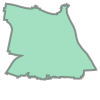

In [4]:
zipcodes.loc[1, 'geometry']

#### ...and printing it


In [5]:
print(zipcodes.loc[0, 'geometry'])

MULTIPOLYGON (((-86.68724897141 36.318212121092, -86.687216475338 36.318210560887, -86.687181702435 36.318208780693, -86.687146962761 36.318206917893, -86.687112187256 36.318205000347, -86.687077445444 36.318202972151, -86.687042702928 36.318200862685, -86.687034690751 36.318200362824, -86.687007959928 36.318198697129, -86.68697325063 36.318196422067, -86.686938539918 36.318194065167, -86.686903827781 36.318191625285, -86.68686914958 36.318189102792, -86.686834437433 36.318186498074, -86.6867997571 36.318183810757, -86.686765111412 36.318181040826, -86.686730430357 36.318178188106, -86.686695782299 36.318175225883, -86.68666116771 36.318172208522, -86.686626552408 36.318169108746, -86.686591935688 36.318165926561, -86.686557318725 36.318162634491, -86.686522735235 36.318159287854, -86.686488151499 36.318155830759, -86.686453600524 36.318152318529, -86.68641904813 36.31814872389, -86.68638449549 36.318145018792, -86.686349976324 36.318141259129, -86.68631549015 36.318137389391, -86.6862

#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


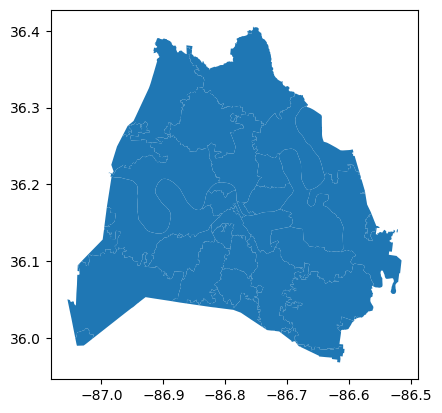

In [6]:
zipcodes.plot();

In [7]:
print(zipcodes.columns)

Index(['zip', 'objectid', 'po_name', 'shape_stlength', 'shape_starea',
       'geometry'],
      dtype='object')


#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by [`matplotib`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)


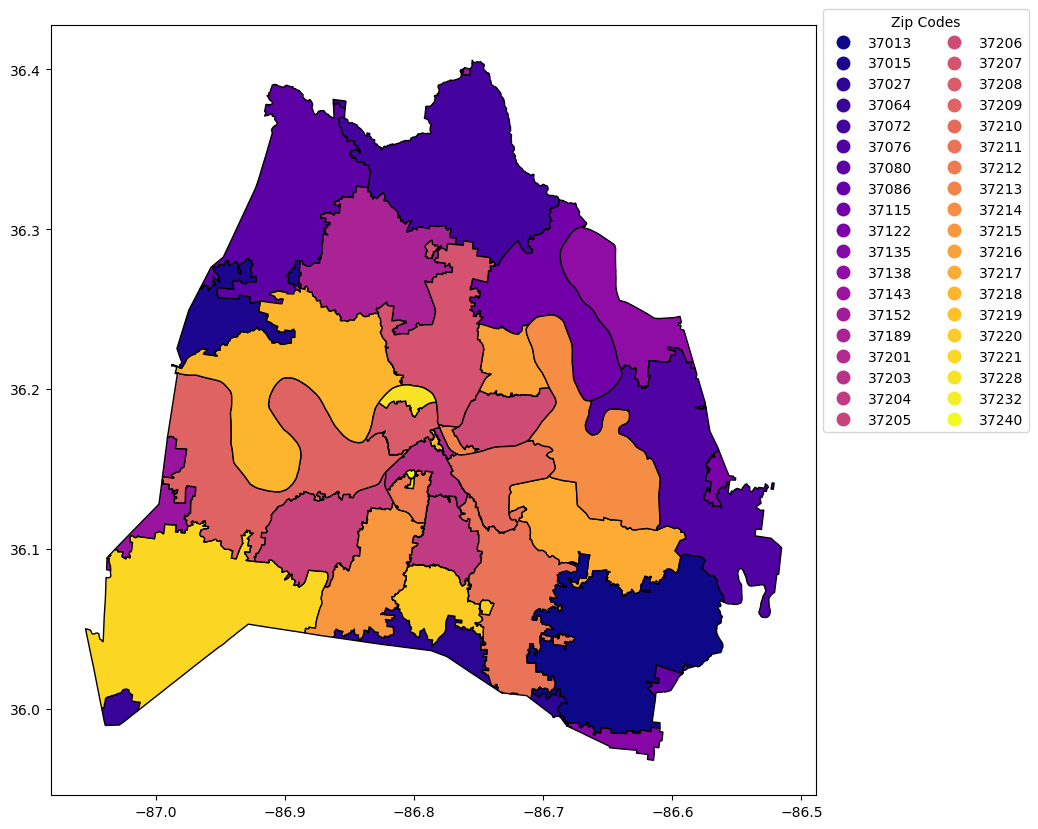

In [9]:
leg_kwds = leg_kwds = {
    'title': 'Zip Codes',
    'loc': 'upper left',
    'bbox_to_anchor': (1, 1.03),
    'ncol': 2}

zipcodes.plot(
    column='zip',         
    figsize=(10, 10),
    edgecolor='black',
    legend=True, 
    legend_kwds=leg_kwds,     
    cmap='plasma')
plt.show()

#### Next you will read in the bus stop data
- downloaded from https://data.nashville.gov/Transportation/Regional-Transportation-Authority-Bus-Stops/p886-fnbd
- cleaned:
    - rename columns 
    - drop unwanted columns 
    - parse `lat` and `lng` columns from `location`
- print the shape 
- take a look at the first 3 rows

In [10]:
bus_stops = pd.read_csv('../data/busstops_cleaned.csv')
print(bus_stops.shape)
bus_stops.head(3)

(2524, 5)


,stop,route,location,lat,lng
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897
2,DONELSON/DELL STATION OUTBOUND,MURFREESBORO PIKE,"(36.105615, -86.672004)",36.105615,-86.672004


In [11]:
bus_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stop      2524 non-null   object 
 1   route     2524 non-null   object 
 2   location  2524 non-null   object 
 3   lat       2524 non-null   float64
 4   lng       2524 non-null   float64
dtypes: float64(2), object(3)
memory usage: 98.7+ KB


- you want the CRS for the bus stops to match the CRS in the zipcodes GeoDataFrame 


In [12]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
zipcodes.type

0     MultiPolygon
1     MultiPolygon
2     MultiPolygon
3     MultiPolygon
4     MultiPolygon
5     MultiPolygon
6     MultiPolygon
7     MultiPolygon
8     MultiPolygon
9     MultiPolygon
10    MultiPolygon
11    MultiPolygon
12    MultiPolygon
13    MultiPolygon
14    MultiPolygon
15    MultiPolygon
16    MultiPolygon
17    MultiPolygon
18    MultiPolygon
19    MultiPolygon
20    MultiPolygon
21    MultiPolygon
22    MultiPolygon
23    MultiPolygon
24    MultiPolygon
25    MultiPolygon
26    MultiPolygon
27    MultiPolygon
28    MultiPolygon
29    MultiPolygon
30    MultiPolygon
31    MultiPolygon
32    MultiPolygon
33    MultiPolygon
34    MultiPolygon
35    MultiPolygon
36    MultiPolygon
37    MultiPolygon
38    MultiPolygon
39    MultiPolygon
40    MultiPolygon
41    MultiPolygon
42    MultiPolygon
43    MultiPolygon
44    MultiPolygon
45    MultiPolygon
46    MultiPolygon
47    MultiPolygon
48    MultiPolygon
49    MultiPolygon
50    MultiPolygon
51    MultiPolygon
52    MultiP

#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry (we will use the geopandas `points_from_xy()` method to create a Point geometry)

In [14]:
bus_geo = gpd.GeoDataFrame(bus_stops, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(bus_stops.lng, bus_stops.lat))

<Axes: >

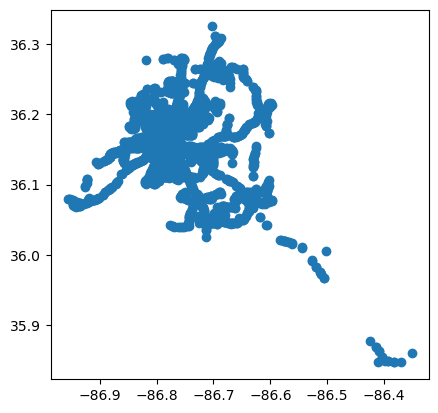

In [15]:
bus_geo.plot()

#### Now you are ready to combine bus stops and zipcodes with a spatial join
- first a little clean up for the zipcodes
    - just keep the zip, po_name, and geometry columns
- then construct the join 
    - keep in mind that you want to find the **bus stops within a zip code polygon**
    - the geometry for the new (combined) GeoDataFrame comes from the left GeoDataFrame


<Axes: >

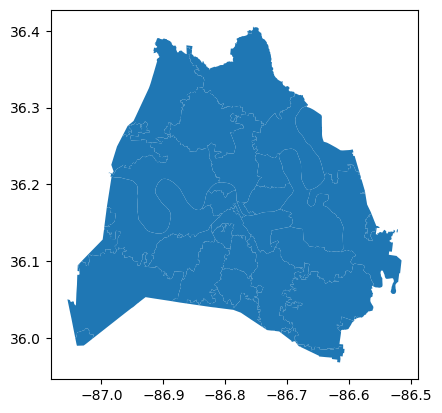

In [17]:
zip_small = zipcodes[["zip", "po_name", "geometry"]].copy()
zip_small.plot()

In [18]:
print(bus_geo.geom_type.unique())
print(zip_small.geom_type.unique())

['Point']
['MultiPolygon']


In [19]:
bus_stops_in_zip = gpd.sjoin(bus_geo, zip_small, predicate = 'within')
bus_stops_in_zip

,stop,route,location,lat,lng,geometry,index_right,zip,po_name
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722,POINT (-86.81672 36.23625),18,37189,WHITES CREEK
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897,POINT (-86.78090 36.14264),35,37203,NASHVILLE
2,DONELSON/DELL STATION OUTBOUND,MURFREESBORO PIKE,"(36.105615, -86.672004)",36.105615,-86.672004,POINT (-86.67200 36.10562),17,37217,NASHVILLE
3,17TH AVE S & DOROTHY PL SB,BELMONT,"(36.137623, -86.795609)",36.137623,-86.795609,POINT (-86.79561 36.13762),9,37212,NASHVILLE
4,COCKRILL ST & 14TH AVE N,ST. CECILIA - CUMBERLAND,"(36.175944, -86.804242)",36.175944,-86.804242,POINT (-86.80424 36.17594),40,37208,NASHVILLE
...,...,...,...,...,...,...,...,...,...
2519,RICHARD JONES RD & LONE OAK RD EB,BELMONT,"(36.104296, -86.809189)",36.104296,-86.809189,POINT (-86.80919 36.10430),44,37215,NASHVILLE
2520,WOODMONT BLVD & PLEASANT VALLEY RD WB,12TH AVENUE SOUTH,"(36.110228, -86.775619)",36.110228,-86.775619,POINT (-86.77562 36.11023),2,37204,NASHVILLE
2521,BUCHANAN ST & 11TH AVE N EB,BORDEAUX,"(36.180257, -86.804974)",36.180257,-86.804974,POINT (-86.80497 36.18026),40,37208,NASHVILLE
2522,MARINA ST & MYRTLE ST EB,McFERRIN,"(36.180416, -86.757368)",36.180416,-86.757368,POINT (-86.75737 36.18042),13,37206,NASHVILLE


#### Now that the data is joined spatially you can count the bus stops by zip code  and see how many stops are within each polygon 
- using the `value_counts()` method


In [20]:
stop_counts_by_zip = bus_stops_in_zip['zip'].value_counts()
print(stop_counts_by_zip)

zip
37207    272
37203    237
37206    205
37211    174
37208    165
37209    149
37210    141
37217    121
37115    106
37013    103
37204     90
37216     88
37214     87
37212     86
37218     83
37215     53
37205     52
37076     50
37219     48
37221     45
37201     36
37138     32
37228     27
37213     10
37027      9
37072      7
37189      5
37240      4
Name: count, dtype: int64


In [22]:
zip_stop_counts = stop_counts_by_zip.rename_axis('zip').reset_index(name='stop_count')
zipcodes_with_counts = zip_small.merge(zip_stop_counts, on='zip', how='left').fillna({'stop_count': 0})
print(zipcodes_with_counts[['zip', 'po_name', 'stop_count']].head())

     zip    po_name  stop_count
0  37115    MADISON       106.0
1  37216  NASHVILLE        88.0
2  37204  NASHVILLE        90.0
3  37027  BRENTWOOD         9.0
4  37064   FRANKLIN         0.0


#### Let's take a closer look at the 272 bus stops in the 37207 zip code
- filter the stops_by_zip data to just get bus stops in 37207
- filter the zip code geodataframe to just the polygon (row) for 37207


In [23]:
stops_37207 = bus_stops_in_zip[bus_stops_in_zip['zip'] == '37207']
print("Number of stops in 37207:", len(stops_37207))
print(stops_37207[['stop', 'route', 'zip']].head())

Number of stops in 37207: 272
                                       stop           route    zip
9             DOVERSIDE DR & MOORWOOD DR EB  DICKERSON ROAD  37207
11           ROWAN DR & BUENA VISTA PIKE SB    WHITES CREEK  37207
17          DICKERSON PIKE & DOUGLAS AVE NB  DICKERSON ROAD  37207
39            DICKERSON PIKE & LEMUEL RD SB  DICKERSON ROAD  37207
44  BAPTIST WORLD CENTER DR & UNNAMED ST SB    WHITES CREEK  37207


In [26]:
zip_37207 = zip_small[zip_small['zip'] == '37207']
print(zip_37207)

      zip    po_name                                           geometry
19  37207  NASHVILLE  MULTIPOLYGON (((-86.78596 36.29097, -86.78595 ...
42  37207  NASHVILLE  MULTIPOLYGON (((-86.75459 36.29021, -86.75465 ...


#### Now plot these two together
- first plot the polygons for 37207 and make them light green
- next plot the points for the bus stops and color them by route

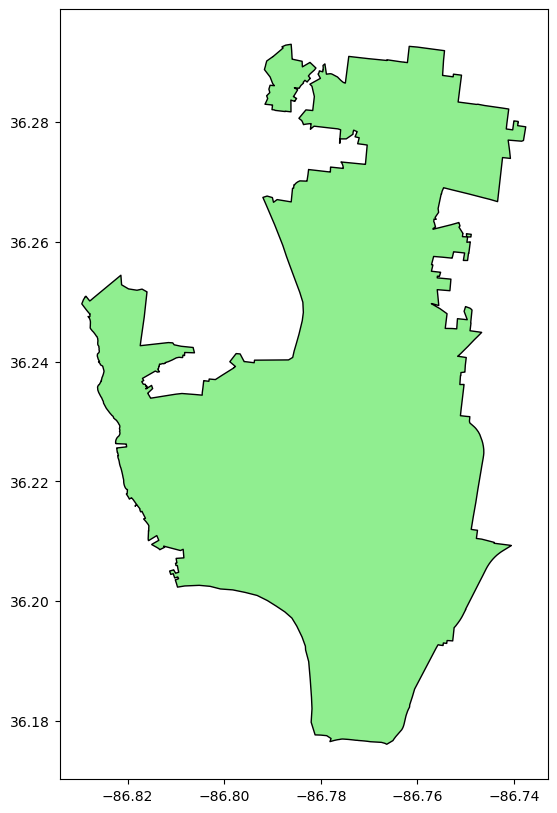

In [27]:
#fig, ax = matplotlib.subplots()
ax = zip_37207.plot(color='lightgreen', edgecolor='black', figsize=(10, 10), )

plt.show()

#### We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.

#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [65]:
center = zip_37207.geometry.centroid.iloc[1]
print(center)


POINT (-86.77676762469858 36.23245257407244)


C:\Users\aveen\AppData\Local\Temp\ipykernel_20024\3121137703.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = zip_37207.geometry.centroid.iloc[1]


#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [61]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.23245257407244, -86.77676762469858]


#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [62]:
#create our map of Nashville Zip Code 37207 and show it
map_37207 = folium.Map(location =  area_center, zoom_start = 12)
map_37207

#### Next, let's add our 37207 polygon and bus stop markers.

#### `itterows()` is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. 
- Below, we are printing the row values for the first 3 row as we iterate through the GeoDataFrame of bus stops in 37207. 
- This idea will be helpful for creating our markers!

In [66]:
i = 0
for row_index, row_values in zip_37207.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 19
values are:
 
zip                                                     37207
po_name                                             NASHVILLE
geometry    MULTIPOLYGON (((-86.785957994862 36.2909727260...
Name: 19, dtype: object
------------------------- 
index is 42
values are:
 
zip                                                     37207
po_name                                             NASHVILLE
geometry    MULTIPOLYGON (((-86.754591258375 36.2902065593...
Name: 42, dtype: object
------------------------- 


#### Create map_37207 again with additional features:
- add the zipcode area outline (polygon_37207)
- iterate through the stops_in_37207 to
    - create location from each lat and lng
    - create a popup from the stop column
    - create a custom icon if you want with [font-awesome](https://fontawesome.com/v4.7.0/icons/)
    - build a marker from each location and popup and (optionally) your custom icon 
    - add the marker to  `map_37207`
- display `map_37207`

In [76]:
#draw our zip code area: 37207
import folium

centroid = zip_37207.to_crs(epsg=4326).geometry.centroid.iloc[1]
map_37207 = folium.Map(location=[centroid.y, centroid.x], zoom_start=13)

folium.GeoJson(
    data=zip_37207.__geo_interface__,
    name='37207 Zip Code',
    style_function=lambda x: {
        'fillColor': 'lightgreen',
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.3
    }
).add_to(map_37207)


for idx, row in stops_37207.iterrows():
    location = [row['lat'], row['lng']]
    
    popup_text = f"Route: {row['route']}" if 'route' in row else "Bus Stop"

    icon = folium.Icon(color="blue", icon="bus", prefix='fa')

    marker = folium.Marker(location=location, popup=popup_text, icon=icon)
    marker.add_to(map_37207)

map_37207

C:\Users\aveen\AppData\Local\Temp\ipykernel_20024\311717032.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = zip_37207.to_crs(epsg=4326).geometry.centroid.iloc[1]


#### If you have a lot of markers, you might want to use marker clusters
- Folium has `MarkerCluster()` and `FastMarkerCluster()`
- Construct a `MarkerCluster()` 
    - construct a `MarkerCluster()` and `.add_to()` the map
    - when you loop through the data and create markers add those to the marker cluster
- Construct a `FastMarkerCluster()` by passing a list of locations

#### You can save your map as an html file and it will retain the interactive qualities

In [77]:
folium.Map?

Init signature:
folium.Map(
    location: Optional[Sequence[float]] = None,
    width: Union[str, float] = '100%',
    height: Union[str, float] = '100%',
    left: Union[str, float] = '0%',
    top: Union[str, float] = '0%',
    position: str = 'relative',
    tiles: Union[str, folium.raster_layers.TileLayer, NoneType] = 'OpenStreetMap',
    attr: Optional[str] = None,
    min_zoom: int = 0,
    max_zoom: int = 18,
    zoom_start: int = 10,
    min_lat: int = -90,
    max_lat: int = 90,
    min_lon: int = -180,
    max_lon: int = 180,
    max_bounds: bool = False,
    crs: str = 'EPSG3857',
    control_scale: bool = False,
    prefer_canvas: bool = False,
    no_touch: bool = False,
    disable_3d: bool = False,
    png_enabled: bool = False,
    zoom_control: bool = True,
    **kwargs: Union[str, float, bool, Sequence, dict, NoneType],
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base map of given width and height with either default
tilesets or a custom tile

In [78]:
cluster_map_37207 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37207)

folium.GeoJson(polygon37207).add_to(cluster_map_37207)

# inside the loop add each marker to the cluster
for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37207.save('../maps/cluster37207.html')

cluster_map_37207  

NameError: name 'polygon37207' is not defined

In [81]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#create a list of locations and pass them to FastMarkerCluster()
locations = stops_in_37207[['lat', 'lng']].values.tolist()
map_37207.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37207

KeyError: "None of [Index(['lat', 'lng'], dtype='object')] are in the [columns]"